# Proyecto Final (Logística para la Fórmula 1)

**Materia:** Matemáticas Discretas  
**Alumno:** Axel Daniel Malváez Flores  
5to Semestre de la Licenciatura en Ciencia de Datos

## Descripción del proyecto  

Se trazará un plan de viaje para la siguiente temporada de la Fórmula 1. Recorreremos varias ciudades en distintos países y determinaremos cual es la mejor fórma de tener 23 carreras, preferiblemente en países distintos de forma que el recorrido (distancia entre circuitos) sea mínima. Añadiremos ciertas métricas que también descartarán circuitos tales como circuitos que ya no tienen contrato o aquellos Grand Prixes que generen un derrame económico alto.

## Data Set

El data set fue obtenido de *Kaggle* en el siguiente link : https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

## Exploración del Data Set

In [1]:
# Librerías importantes que utilizaremos en el proyecto
import numpy as np 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium
#sns.set()
plt.rcParams["figure.figsize"] = (20,20)

In [2]:
circuits = pd.read_csv('Formula1/circuits.csv').drop(['url'], axis=1)
circuits = gpd.GeoDataFrame(circuits, geometry=gpd.points_from_xy(circuits.lng, circuits.lat))
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,geometry
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,POINT (144.96800 -37.84970)
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,POINT (101.73800 2.76083)
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,POINT (50.51060 26.03250)
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,POINT (2.26111 41.57000)
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,POINT (29.40500 40.95170)


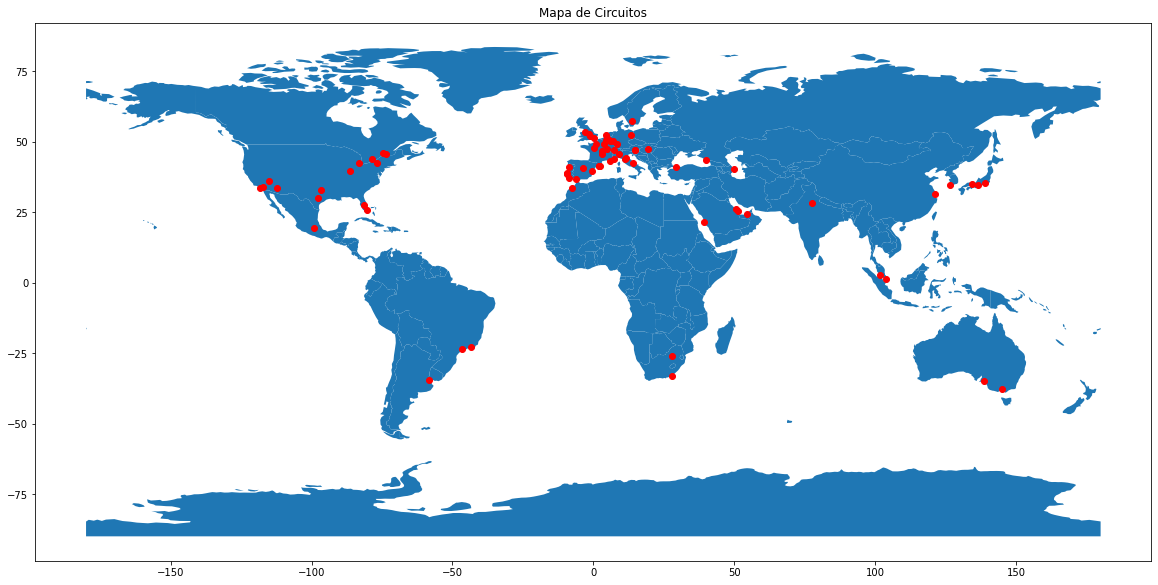

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot()
circuits.plot(ax=ax, color='red')
plt.title('Mapa de Circuitos')
plt.show()

In [4]:
m = folium.Map()
for _, r in circuits.iterrows():
    lat = r['geometry'].y
    lon = r['geometry'].x
    folium.Marker(location=[lat, lon],
                  popup='Circuit Name: {} <br> Country: {}'.format(r['name'], r['country'])).add_to(m)

m

Distances between each point

In [5]:
circuits = circuits.set_crs('epsg:4326')
circuits = circuits.to_crs(epsg=32631)

In [6]:
circuit_1 = circuits.loc[0]
circuit_2 = circuits.loc[3]

In [9]:
print(f'The distance between the {circuit_1[2]} in {circuit_1[4]} and {circuit_2[2]} in {circuit_2[4]} is {circuit_1[8].distance(circuit_2[8])}')

The distance between the Albert Park Grand Prix Circuit in Australia and Circuit de Barcelona-Catalunya in Spain is 19956335.372858867
